### Imports 

In [22]:
from __future__ import division, absolute_import, print_function
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
import keras.utils as ku 
from tensorflow import set_random_seed
from numpy.random import seed
from six.moves import urllib, xrange
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt    
%matplotlib inline
from IPython import display
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import collections, math, os, random, zipfile
import pandas as pd
import numpy as np
import string, os 
import json

set_random_seed(37)
seed(7)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


### Load Dataset

In [23]:
curr_dir = './input/'
filename = "lyrics_data.csv"
lyrics_list = []

lyrics_df = pd.read_csv(curr_dir + filename)
lyrics_list.extend(list(lyrics_df.lyrics.values))
    
lyrics_list = [str(corpus)[0:1100] for corpus in lyrics_list if corpus != "Unknown" ]
len(lyrics_list)
print(lyrics_list[0])

Oh baby, how you doing?
You know I'm gonna cut right to the chase
Some women were made but me, myself
I like to think that I was created for a special purpose
You know, what's more special than you? You feel me
It's on baby, let's get lost
You don't need to call into work 'cause you're the boss
For real, want you to show me how you feel
I consider myself lucky, that's a big deal
Why? Well, you got the key to my heart
But you ain't gonna need it, I'd rather you open up my body
And show me secrets, you didn't know was inside
No need for me to lie
It's too big, it's too wide
It's too strong, it won't fit
It's too much, it's too tough
He talk like this 'cause he can back it up
He got a big ego, such a huge ego
I love his big ego, it's too much
He walk like this 'cause he can back it up
Usually I'm humble, right now I don't choose
You can leave with me or you could have the blues
Some call it arrogant, I call it confident
You decide when you find on what I'm working with
Damn I know I'm kil

### Clean Dataset

In [24]:
def filter_and_clean_data(data):
    # remove string.punctuation and make all lyrics lowecase
    data = "".join(d for d in data if d not in string.punctuation).lower()
    # remove new line
    data = data.replace("\n", " ")
    # ignore to just leave the character out of the Unicode result
    return data.encode("utf8").decode("ascii","ignore")

# how many items to keep
k_items = 200
lyrics_corpus = [filter_and_clean_data(d) for d in lyrics_list[0:k_items]]

print(lyrics_corpus[0])

oh baby how you doing you know im gonna cut right to the chase some women were made but me myself i like to think that i was created for a special purpose you know whats more special than you you feel me its on baby lets get lost you dont need to call into work cause youre the boss for real want you to show me how you feel i consider myself lucky thats a big deal why well you got the key to my heart but you aint gonna need it id rather you open up my body and show me secrets you didnt know was inside no need for me to lie its too big its too wide its too strong it wont fit its too much its too tough he talk like this cause he can back it up he got a big ego such a huge ego i love his big ego its too much he walk like this cause he can back it up usually im humble right now i dont choose you can leave with me or you could have the blues some call it arrogant i call it confident you decide when you find on what im working with damn i know im killing you with them legs better yet them thi

### Tokenize data to create "clases"

In [25]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## create sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

list_of_sequences, words_list_size = get_sequence_of_tokens(lyrics_corpus)
print("Sample List", list_of_sequences[:5])
print("Words list size: ", words_list_size)


Sample List [[30, 18], [30, 18, 51], [30, 18, 51, 1], [30, 18, 51, 1, 623], [30, 18, 51, 1, 623, 1]]
Words list size:  3359


In [26]:
def generate_padded_sequences(input_sequences, words_list_size):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=words_list_size)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(list_of_sequences, words_list_size)

In [27]:
def create_lstm_model(sequence_length, total_num_of_words):
    input_length = sequence_length - 1
    model = Sequential()
    
    # input Embedding Layer using all the words
    model.add(Embedding(total_num_of_words, 10, input_length=input_length))
    model.add(LSTM(256, return_sequences=True))  # single hidden LSTM layer with 256 memory units
    model.add(LSTM(256))  # single hidden LSTM layer with 256 memory units
    model.add(Dropout(0.1)) # dropout probability of 10
    # output a probability prediction all the words (total_num_of_words) between 0 and 1
    model.add(Dense(total_num_of_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_lstm_model(max_sequence_len, words_list_size)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 248, 10)           33590     
_________________________________________________________________
lstm_3 (LSTM)                (None, 248, 256)          273408    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3359)              863263    
Total params: 1,695,573
Trainable params: 1,695,573
Non-trainable params: 0
_________________________________________________________________


### Train LSTM Model
It takes 5 hours to train to I just commented out

In [28]:
# model.fit(predictors, label, epochs=20, verbose=1)
# model_json = model.to_json()
# with open("model_in_json.json", "w") as json_file:
#     json.dump(model_json, json_file)
# model.save_weights("weights3.h5")


![Training Model](TrainingModel.png)


### Load Trained Model

In [29]:
with open('model_in_json.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('weights.h5')

In [30]:
def predict_and_generate_lytics_text_from_intial_text(initial_text, words_to_predict, model, max_sequence_len):
    for _ in range(words_to_predict):
        token_list = tokenizer.texts_to_sequences([initial_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_id = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted_id:
                output_word = word
                break
        initial_text += " "+output_word
    return initial_text.title()

In [31]:
initial_lyrics = [
    "i love you baby yes",
    "love and hate",
    "you are mine",
    "hey baby where are you",
    "im the girl",
    "easy for you to say",
    "yea that is right",
    "Beyonce was right"
]

### Predict lyrics:

In [32]:
final_lyrics = []

for initial_lytics in initial_lyrics:
    predicted = predict_and_generate_lytics_text_from_intial_text(initial_lytics, 15, model, max_sequence_len)
    final_lyrics.append(predicted)
    print(predicted)

I Love You Baby Yes You Dont Even Be About A Star Im Not The Average Chick Eeeverybody Wants You
Love And Hate You Home Me Me And I Dont Know If You Let Him Take Me From
You Are Mine Is For The World Is Who Run The World Girls Who Run The World Girls
Hey Baby Where Are You Comes Back Around Hey My Baby What Goes Around Comes Back Around Hey My Baby
Im The Girl From Virgo The Joy Of Taste To The Sun With You Next To Me Forward
Easy For You To Say You Dont Deserve It Wrong You Made Me Feel So Lucky 7 That I Can
Yea That Is Right I See You Hurt Me I Got You So Help Me Jesus My Souls In
Beyonce Was Right Baby Ahh Hat Jayz I Love You You Love Me I Love You You Got


In [33]:
final_lyrics[0]

'I Love You Baby Yes You Dont Even Be About A Star Im Not The Average Chick Eeeverybody Wants You'

### Words to plot

In [34]:
final_lyrics_word_list = []
for ly in final_lyrics:
    splitted = ly.split(" ")
    for sp in splitted:
         final_lyrics_word_list.append(sp)
print(final_lyrics_word_list)

['I', 'Love', 'You', 'Baby', 'Yes', 'You', 'Dont', 'Even', 'Be', 'About', 'A', 'Star', 'Im', 'Not', 'The', 'Average', 'Chick', 'Eeeverybody', 'Wants', 'You', 'Love', 'And', 'Hate', 'You', 'Home', 'Me', 'Me', 'And', 'I', 'Dont', 'Know', 'If', 'You', 'Let', 'Him', 'Take', 'Me', 'From', 'You', 'Are', 'Mine', 'Is', 'For', 'The', 'World', 'Is', 'Who', 'Run', 'The', 'World', 'Girls', 'Who', 'Run', 'The', 'World', 'Girls', 'Hey', 'Baby', 'Where', 'Are', 'You', 'Comes', 'Back', 'Around', 'Hey', 'My', 'Baby', 'What', 'Goes', 'Around', 'Comes', 'Back', 'Around', 'Hey', 'My', 'Baby', 'Im', 'The', 'Girl', 'From', 'Virgo', 'The', 'Joy', 'Of', 'Taste', 'To', 'The', 'Sun', 'With', 'You', 'Next', 'To', 'Me', 'Forward', 'Easy', 'For', 'You', 'To', 'Say', 'You', 'Dont', 'Deserve', 'It', 'Wrong', 'You', 'Made', 'Me', 'Feel', 'So', 'Lucky', '7', 'That', 'I', 'Can', 'Yea', 'That', 'Is', 'Right', 'I', 'See', 'You', 'Hurt', 'Me', 'I', 'Got', 'You', 'So', 'Help', 'Me', 'Jesus', 'My', 'Souls', 'In', 'Beyonce',

### Plot results

In [ ]:
all_words = [word for line in lyrics_corpus for word in line.split()]

In [ ]:
all_words[0:10]

['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut']

In [ ]:
total_vocabulary_size = 50000

def create_words_dataset(words_list):
    common_words = [['UNK', -1]]
    common_words.extend(collections.Counter(words_list).most_common(total_vocabulary_size - 1))
    words_dictionary = {}
    for word, _ in common_words:
        words_dictionary[word] = len(words_dictionary)
    data = []
    bad_data_count = 0
    for word in words_list:
        if word in words_dictionary:
            index = words_dictionary[word]
        else:
            index = 0 
            bad_data_count += 1
        data.append(index)
    common_words[0][1] = bad_data_count
    words_reverse_dictionary = dict(zip(words_dictionary.values(), words_dictionary.keys()))
    return data, common_words, words_dictionary, words_reverse_dictionary

data, common_words, words_dictionary, words_reverse_dictionary = create_words_dataset(all_words)

print('Common words:', common_words[:10])
print('Sample data:', [words_reverse_dictionary[i] for i in data[:10]])

Common words: [['UNK', 0], ('you', 1958), ('i', 1787), ('the', 1179), ('me', 1131), ('to', 862), ('and', 740), ('my', 696), ('a', 603), ('im', 502)]
Sample data: ['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut']


In [ ]:
data_index = 0

# generate data for model.
def created_words_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window
        targets_to_avoid = [skip_window]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

batch, labels = created_words_batch(batch_size=8, num_skips=2, skip_window=1)

### Train Model

In [ ]:
# variables to tune!
batch_size = 128
embedding_size = 128 
skip_window = 1 
num_skips = 2 
valid_size = 16 
valid_window = 100 
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64

graph = tf.Graph()

with graph.as_default():
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
    
    embeddings = tf.Variable(tf.random_uniform([total_vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)
    nce_weights = tf.Variable(tf.truncated_normal([total_vocabulary_size, embedding_size], stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([total_vocabulary_size]))
    loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weights, biases=nce_biases,
                     labels=train_labels, inputs=embed, num_sampled=num_sampled, num_classes=total_vocabulary_size))
    # SGD optimizer with a learning rate of 1.0
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)
    # use the cosine similarity between between batches ans examples
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)
    init = tf.initialize_all_variables()
    
# steps to train the model
number_of_epoch = 20001

steplist=[]
losslist=[]
with tf.Session(graph=graph) as session:
    init.run()

    average_loss = 0
    for epoch in xrange(number_of_epoch):
        # create a batch of training data
        batch_inputs, batch_labels = created_words_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}
        
        _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += loss_val        
        if epoch % 1000 == 0:
            steplist.append(epoch)
            if epoch > 0:
                average_loss /= 1000
            print("Average loss at epoch ", epoch, ": ", average_loss)
            losslist.append(average_loss)
            average_loss = 0
    final_embeddings = normalized_embeddings.eval()    

Average loss at epoch  0 :  283.5305480957031
Average loss at epoch  1000 :  138.3710802001953
Average loss at epoch  2000 :  72.19819951629638
Average loss at epoch  3000 :  50.757322302818295
Average loss at epoch  4000 :  37.48639799594879
Average loss at epoch  5000 :  28.284880152463913
Average loss at epoch  6000 :  22.953699594020843
Average loss at epoch  7000 :  18.97121021950245
Average loss at epoch  8000 :  15.0999660551548
Average loss at epoch  9000 :  13.295054379105569
Average loss at epoch  10000 :  10.821265006780624
Average loss at epoch  11000 :  9.007525397777558
Average loss at epoch  12000 :  8.073492198884487
Average loss at epoch  13000 :  7.487640174031258
Average loss at epoch  14000 :  7.00220100736618
Average loss at epoch  15000 :  5.929356953024864
Average loss at epoch  16000 :  5.975418219208717
Average loss at epoch  17000 :  4.929553095161915
Average loss at epoch  18000 :  4.814177041113377
Average loss at epoch  19000 :  4.46700896179676
Average los

### Create Plot visualization function for word simirarities

In [ ]:

def plot_with_labels(final_embeddings, li, plot_only, filename='lyrics_visualization.png'):
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    list_ = [x.lower() for x in li]
    nums = []
    new_list = []
    for i in words_reverse_dictionary:
        if words_reverse_dictionary[i] in list_:
            nums.append(i)
            new_list.append(words_reverse_dictionary[i])

    low_dim_embs = tsne.fit_transform(final_embeddings[nums, :])
    labels = [words_reverse_dictionary[i] for i in nums]
    
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))    
    vec_x = [] 
    vec_y = []
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        vec_x.append(x)
        vec_y.append(y)
        plt.scatter(x, y,s=50)
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', ha='right', va='bottom')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
    display.clear_output(wait=True)
       
    for i, label in enumerate(labels):
        plt.plot(vec_x, vec_y,'.r-', markersize=10, linewidth=10)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
    display.clear_output(wait=True)  
    # save the plot
    plt.savefig(filename)
    

### Predicted lyrics words similarityo to display:

In [ ]:
print(final_lyrics_word_list)

['I', 'Love', 'You', 'Baby', 'Yes', 'You', 'Dont', 'Even', 'Be', 'About', 'A', 'Star', 'Im', 'Not', 'The', 'Average', 'Chick', 'Eeeverybody', 'Wants', 'You', 'Love', 'And', 'Hate', 'You', 'Home', 'Me', 'Me', 'And', 'I', 'Dont', 'Know', 'If', 'You', 'Let', 'Him', 'Take', 'Me', 'From', 'You', 'Are', 'Mine', 'Is', 'For', 'The', 'World', 'Is', 'Who', 'Run', 'The', 'World', 'Girls', 'Who', 'Run', 'The', 'World', 'Girls', 'Hey', 'Baby', 'Where', 'Are', 'You', 'Comes', 'Back', 'Around', 'Hey', 'My', 'Baby', 'What', 'Goes', 'Around', 'Comes', 'Back', 'Around', 'Hey', 'My', 'Baby', 'Im', 'The', 'Girl', 'From', 'Virgo', 'The', 'Joy', 'Of', 'Taste', 'To', 'The', 'Sun', 'With', 'You', 'Next', 'To', 'Me', 'Forward', 'Easy', 'For', 'You', 'To', 'Say', 'You', 'Dont', 'Deserve', 'It', 'Wrong', 'You', 'Made', 'Me', 'Feel', 'So', 'Lucky', '7', 'That', 'I', 'Can', 'Yea', 'That', 'Is', 'Right', 'I', 'See', 'You', 'Hurt', 'Me', 'I', 'Got', 'You', 'So', 'Help', 'Me', 'Jesus', 'My', 'Souls', 'In', 'Beyonce',

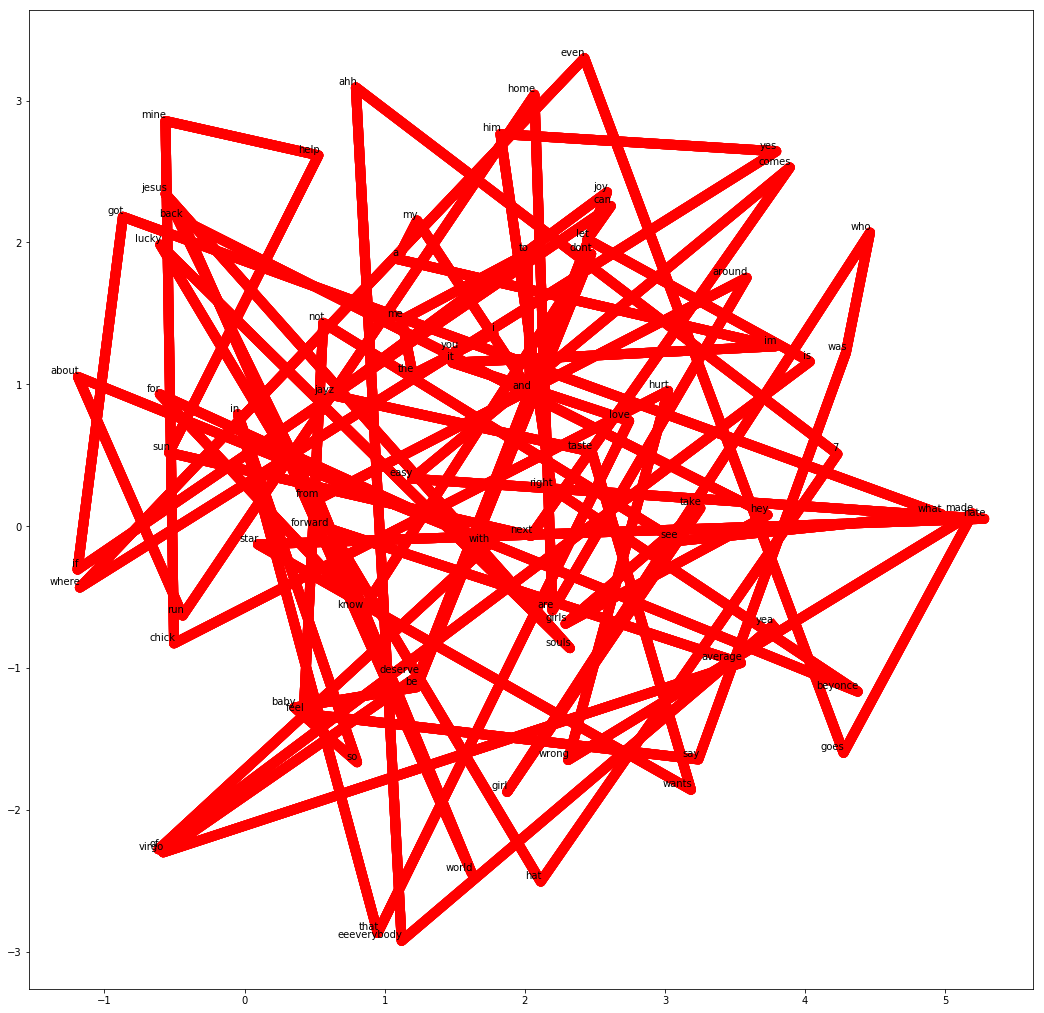

In [ ]:
plot_with_labels(final_embeddings, final_lyrics_word_list, 10)